# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
import pandas as pd
tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

# Criar a inteligência artificial e fazer as previsões

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

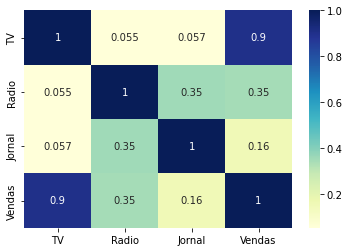

In [14]:
# Análise exploratória -> Entender como a sua base de dados está se comportanto
# Usar matplotlib e o seaborn para criar gráficos
import seaborn as sns
import matplotlib.pyplot as plt 

tabela.corr() # calcula a correlação. O resultado é uma tabela de confusão com a correlação entre todos

# Apresentação da coorreção em Mapa de calor
# Cria gráfico 
sns.heatmap(tabela.corr(), annot=True, cmap = "YlGnBu") # annot para incluir informações dos valores, cmap para mudar cor
# Exibe o gráfico
plt.show() # Exibe sempre o último gráfico criado

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [28]:
# y -> quem você quer prever -> vendas
# x -> o resto da base de dados (quem você vai usar pra fazer a previsão)

y = tabela["Vendas"]
x = tabela[["TV","Radio","Jornal"]]

# Bliblioteca pra organziar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# Ordem da divisão das bases deve ser seguida conforme abaixo
# A proporção do tamanho da base de teste padrão é de 25%, caso queira personalizado tem que inserir o parâmetro test_size 
# random_state=1 -> mantém sempre a mesma divisão para não ficar aleatório
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.1, random_state=1)
# ESTUDO DE CASO, COMO FAZER UMA VALIDAÇÃO CRUZADA
# FAZER UM FOR COM SEPARAÇÃO INÉDITA

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [30]:
# Testar pra ver qual inteligência artifical é melhor 
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste,previsao_regressaolinear))
print(r2_score(y_teste,previsao_arvoredecisao))

0.8241360598317957
0.9285364910236862


#### Visualização Gráfica das Previsões

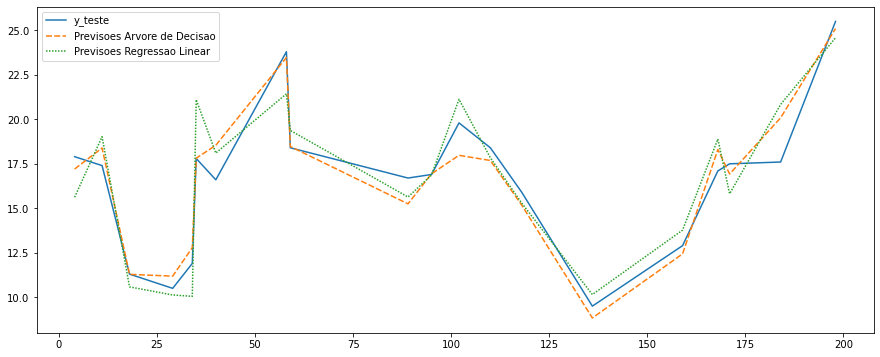

In [33]:
# O que o R2 faz, ele compara a distância quadrada do modelo com o teste
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsoes Arvore de Decisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsoes Regressao Linear'] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [35]:
novos = pd.read_csv("novos.csv")
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [36]:
# Modelo vencedor foi a Árvore de Decisão
previsao=modelo_arvoredecisao.predict(novos)
print(previsao) # Resultado -> cada célula é a previsão de cada linha simulada da base "novos"


[ 7.613  8.368 19.921]
